This notebook illustrates the [TubeTK](http://tubetk.org) tube NumPy array data structure and how to create histograms of the properties of a [VesselTube](http://www.itk.org/Doxygen/html/classitk_1_1VesselTubeSpatialObject.html).

First, import the function for reading a tube file in as a NumPy array, and read in the file.

In [7]:
import os
import sys

In [16]:
# Path for TubeTK libs
TubeTK_BUILD_DIR=None
if 'TubeTK_BUILD_DIR' in os.environ:
    TubeTK_BUILD_DIR = os.environ['TubeTK_BUILD_DIR']
if not os.path.exists(TubeTK_BUILD_DIR):
    print('TubeTK_BUILD_DIR not found!')
    print('  Set environment variable')
    sys.exit(1)

In [18]:
sys.path.append(os.path.join(TubeTK_BUILD_DIR,'Base/Python'))
import tubetk
from tubetk.numpy import tubes_from_file

import os
filepath = os.path.join(os.path.dirname(tubetk.__file__),
                        '..', '..', '..',
                        'MIDAS_Data', 'VascularNetwork.tre')

tubes = tubes_from_file(filepath)

The result is a [NumPy Record Array](http://docs.scipy.org/doc/numpy/user/basics.rec.html) where the fields of the array correspond to the properties of a [VesselTubeSpatialObjectPoint](http://www.itk.org/Doxygen/html/classitk_1_1VesselTubeSpatialObjectPoint.html).

In [19]:
print(type(tubes))
print(tubes.dtype)

<type 'numpy.ndarray'>
[('ID', '<i4'), ('Position', '<f8', (3,)), ('Color', '<f4', (4,)), ('Tangent', '<f8', (3,)), ('Normal1', '<f8', (3,)), ('Normal2', '<f8', (3,)), ('Radius', '<f4'), ('Alpha1', '<f4'), ('Alpha2', '<f4'), ('Alpha3', '<f4'), ('Medialness', '<f4'), ('Ridgeness', '<f4'), ('Branchness', '<f4'), ('Mark', '?')]


The length of the array corresponds to the number of points that make up the tubes.

In [20]:
print(len(tubes))
print(tubes.shape)

110655
(110655,)


Individual points can be sliced, or views can be created on individual fields.

In [21]:
print('Entire points 0, 2:')
print(tubes[:4:2])

print('\nPosition of points 0, 2')
print(tubes['Position'][:4:2])

Entire points 0, 2:
[ (-1, [249.4600067138672, 185.70599365234375, 0.5305629968643188], [1.0, 0.0, 0.0, 1.0], [0.16296979670004633, -0.9853404631248955, -0.050448162428001125], [-0.8861203952887874, -0.12369174779149847, -0.44664414983466155], [-0.43385653206652175, -0.11749265192811313, 0.8932882996693231], 2.4312500953674316, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, False)
 (-1, [249.46099853515625, 185.6999969482422, 0.5302559733390808], [1.0, 0.0, 0.0, 1.0], [0.26352887911124834, -0.964488943346244, -0.017708981823207896], [0.7833838934817812, 0.22468554453320252, -0.5795050314804383], [-0.5629051477004758, -0.13884338025510587, -0.8147762333620451], 2.4308600425720215, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, False)]

Position of points 0, 2
[[ 249.46000671  185.70599365    0.530563  ]
 [ 249.46099854  185.69999695    0.53025597]]


We can easily create a histogram of the radii or visualize the point positions.

Populating the interactive namespace from numpy and matplotlib


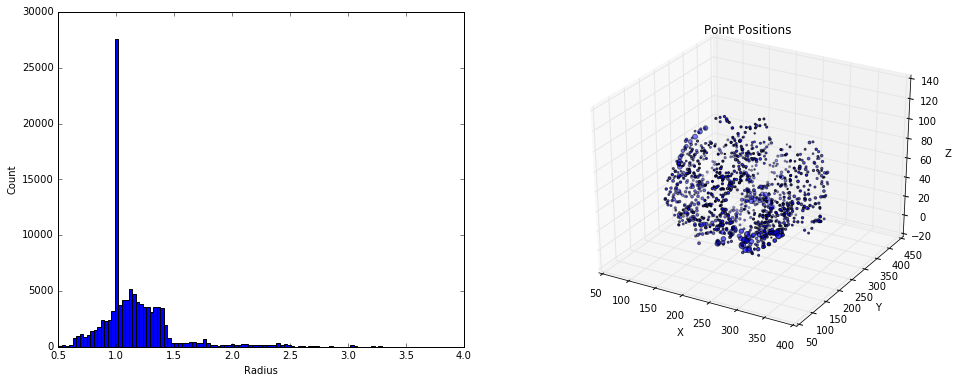

In [22]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1)
ax.hist(tubes['Radius'], bins=100)
ax.set_xlabel('Radius')
ax.set_ylabel('Count')

ax = fig.add_subplot(1, 2, 2, projection='3d')
subsample = 100
position = tubes['Position'][::subsample]
radius = tubes['Radius'][::subsample]
ax.scatter(position[:,0], position[:,1], position[:,2], s=(2*radius)**2)
ax.set_title('Point Positions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');